Plotting functions for comparing survival and recovery of groups of species within a single model scenario from the Salish Sea Atlantis Model

In [1]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

## Define scenario and control files

In [16]:
# Read in salish sea atlantis output files.
control_name = "v6699_control_HR1yr"
scenario_name = "v6699_18F_HR1yr"
names = [control_name, scenario_name]

In [9]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/Test_Scenario_5b_"+ control_name + "/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)

In [10]:
scenario_path = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/Test_Scenario_5b_" + scenario_name + "/outputSalishSea.nc"
scenario = xr.open_dataset(str(scenario_path), decode_cf=True)

In [13]:
t = np.ma.filled(scenario.variables['t'], np.nan)

# start and end time of data display, after burn-in
start = 0
end = t.size-1

time = t[start:end]

spill_start = np.datetime64('1993-01-01')
spill_end = np.datetime64('1993-01-08')

In [21]:
def pelagic_compare_scenarios(group, scenario, names, y_min=None, y_max=None): #bacteria, plankton, sharks, birds, mammals, named_fish, salmon, fish, benth_feeders

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:

        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,0:6], np.nan)
        pelagic_control = pelagic_control.sum(axis=2)
        pelagic_control = pelagic_control.sum(axis=1)
        control_ratio = (pelagic_control / pelagic_control-1)*100
        ax.plot(time[start:end], control_ratio, 'k', linewidth = 2)

        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,0:6], np.nan) # tonnes
        pelagic_oiled = pelagic_oiled.sum(axis=2) 
        pelagic_oiled = pelagic_oiled.sum(axis=1) 
        ratio = (pelagic_oiled / pelagic_control-1)*100
        ax.plot(time[start:end], ratio, linewidth = 2) #semilogy color = line_colour, linestyle = line_type, 

        plt.ylabel('Percent (%) change', fontsize=12)
        ax.set_title(species)
        ax.set_ylim([y_min, y_max])
    fig.legend(names, bbox_to_anchor=(1.05, 1), fontsize=12); #loc='upper left', 

### Across whole model

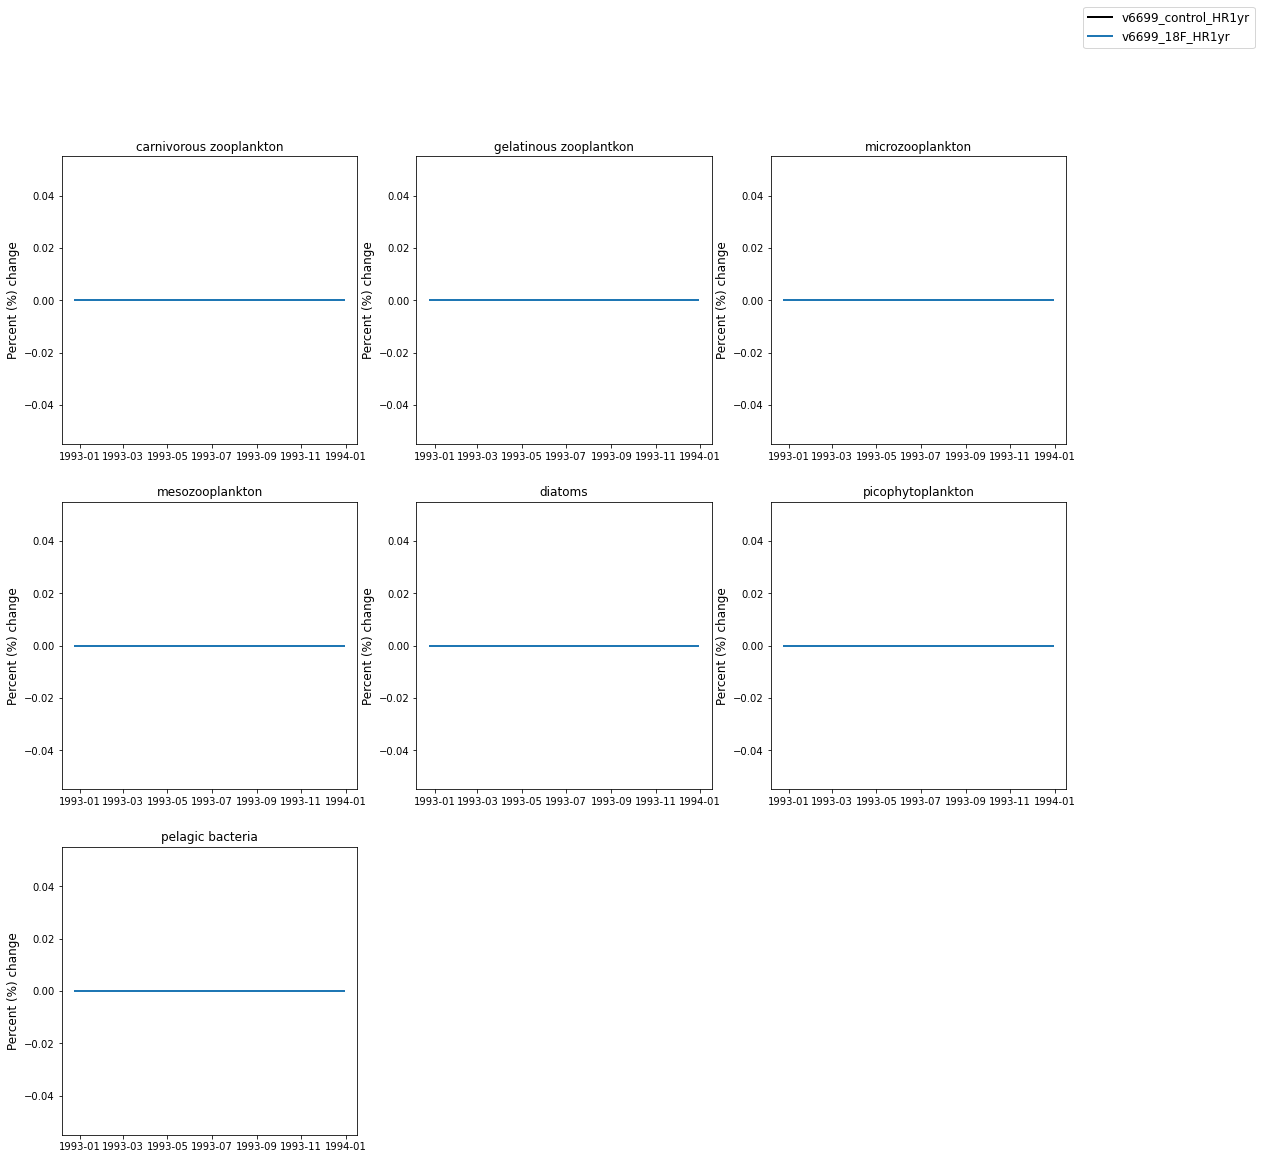

In [22]:
pelagic_compare_scenarios(groups.plankton, scenario, names)

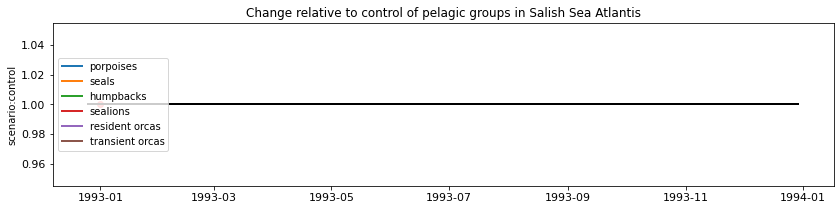

In [14]:
splot.plot_pelagic(groups.mammals, scenario, control, time, start, end, spill_start)

### Individual boxes

In [ ]:
plot_benthic_box(benthos, scenario1, 5)

In [ ]:
plot_benthic_box(shellfish, scenario1, 5)

In [ ]:
plot_sediment_box(benth_feeders, scenario1, 5)

In [ ]:
plot_bacteria_box(scenario1, 5)

In [ ]:
plot_bacteria_box_test(scenario1, 5)

In [ ]:
plot_pelagic_box(plankton, scenario1, 5)

In [ ]:
plot_sediment_box(plankton, scenario1, 5)

In [ ]:
plot_pelagic_box(fish, scenario1, 5)

In [ ]:
plot_pelagic_box(named_fish, scenario1, 5)

In [ ]:
plot_bacteria_box(scenario1, 75)

In [ ]:
plot_bacteria_box(scenario1, 80)

In [ ]:
plot_bacteria_box(scenario1, 57)

In [ ]:
plot_bacteria_box(scenario1, 86) #low discharge

In [ ]:
plot_bacteria_box(scenario1, 11) #no direct discharge, US side